In [33]:
%pwd

'd:\\M___L\\MovieRecommendationSystem\\notebooks'

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline


In [35]:
ratings = pd.read_csv('../data/raw/ratings.csv')
movies = pd.read_csv('../data/raw/movies.csv')

print("ratings")
print(ratings.head())
print("movies")
print(movies.head())

ratings
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
movies
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [36]:
print("Ratings shape: ",ratings.shape)
print("Movies shape: ",movies.shape)
print("Ratings column: ",ratings.columns.tolist())
print("Moives column: ",movies.columns.tolist())

Ratings shape:  (100836, 4)
Movies shape:  (9742, 3)
Ratings column:  ['userId', 'movieId', 'rating', 'timestamp']
Moives column:  ['movieId', 'title', 'genres']


In [37]:
print("missing values in ratings")
print(ratings.isnull().sum())
print("missing values in movies")
print(movies.isnull().sum())

missing values in ratings
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
missing values in movies
movieId    0
title      0
genres     0
dtype: int64


In [38]:
print("data type of ratings")
print(ratings.dtypes)
print("data type of movies")
print(movies.dtypes)

data type of ratings
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
data type of movies
movieId     int64
title      object
genres     object
dtype: object


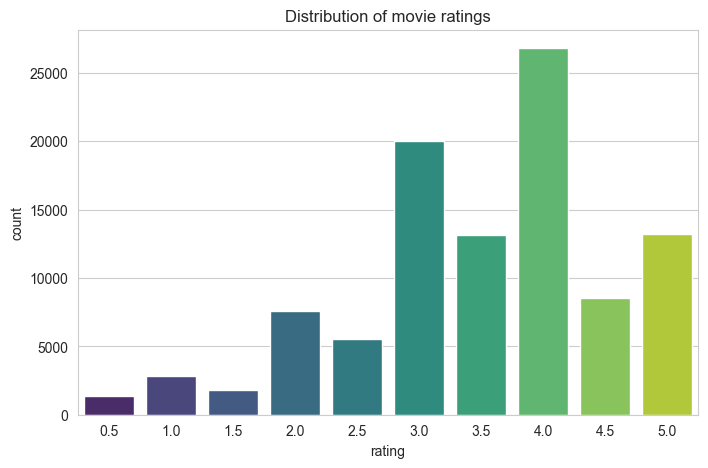

Average rating:  3.501556983616962


In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating',data=ratings, palette='viridis')
plt.title("Distribution of movie ratings")
plt.show()

print("Average rating: ",ratings['rating'].mean())

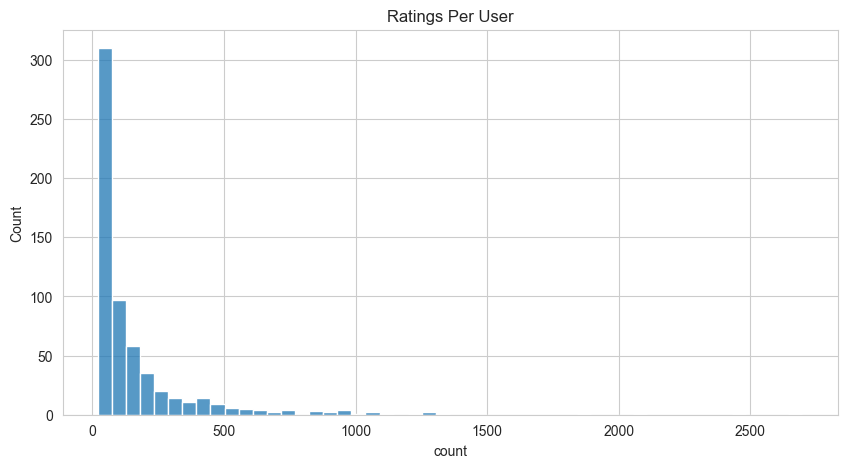

In [40]:
ratings_per_user = ratings['userId'].value_counts()
plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user,bins=50,kde=False)
plt.title("Ratings Per User")
plt.show()


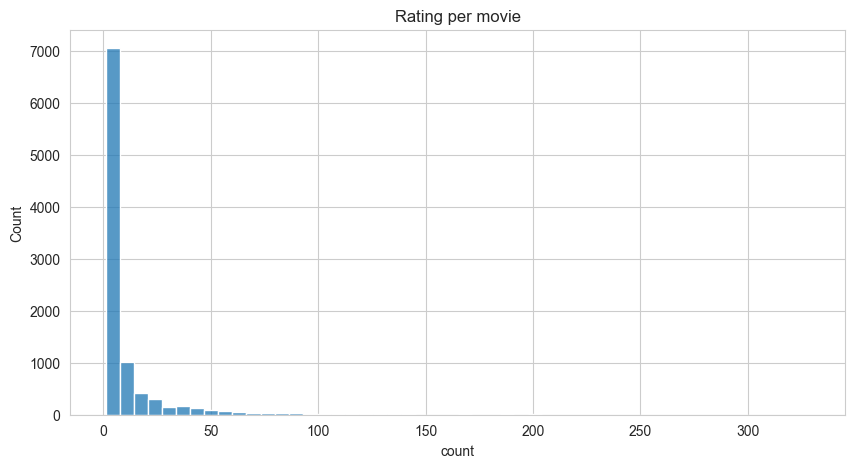

In [41]:
ratings_per_movie = ratings['movieId'].value_counts()
plt.figure(figsize=(10,5))
sns.histplot(rating_per_movie,bins=50,kde=False)
plt.title("Rating per movie")
plt.show()

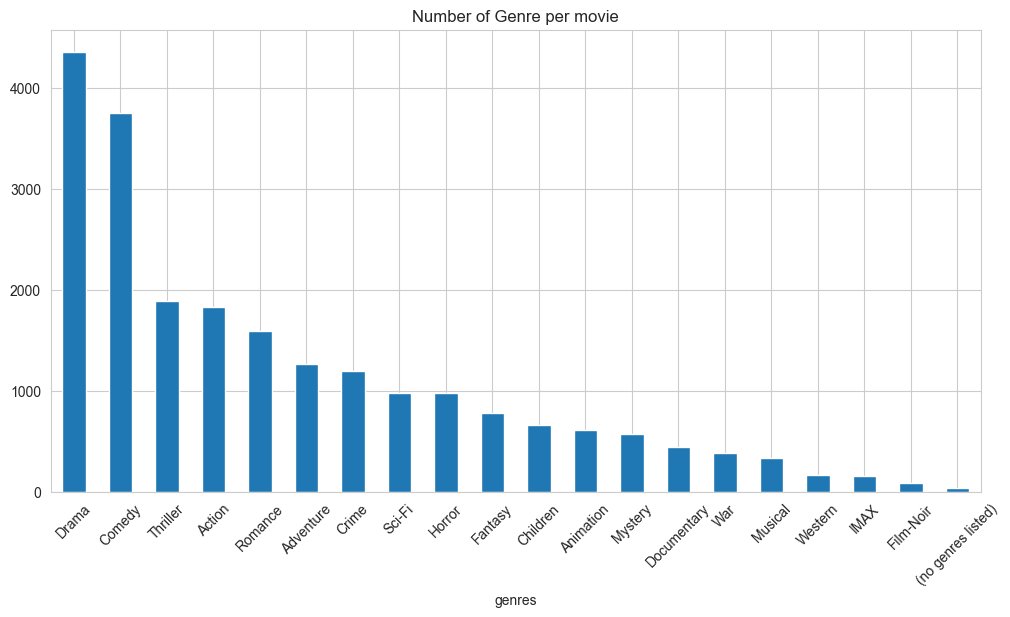

In [42]:
movies['genres'] = movies['genres'].str.split('|')

all_genres = movies['genres'].explode().value_counts()

plt.figure(figsize=(12,6))
all_genres.plot(kind='bar')
plt.title("Number of Genre per movie")
plt.xticks(rotation=45)
plt.show()


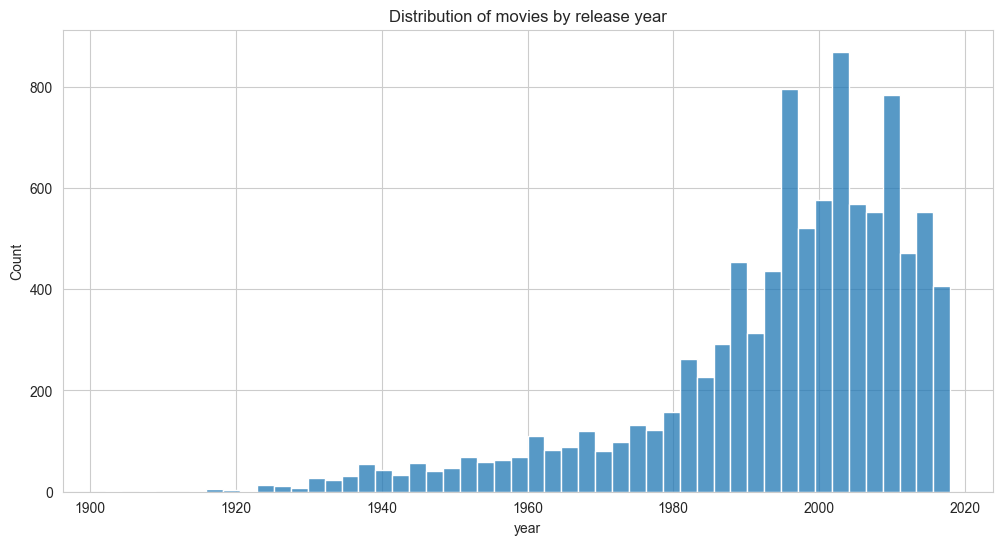

In [43]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = pd.to_numeric(movies['year'],errors='coerce')

plt.figure(figsize=(12,6))
sns.histplot(movies['year'].dropna(),bins=50,kde=False)
plt.title("Distribution of movies by release year")
plt.show()

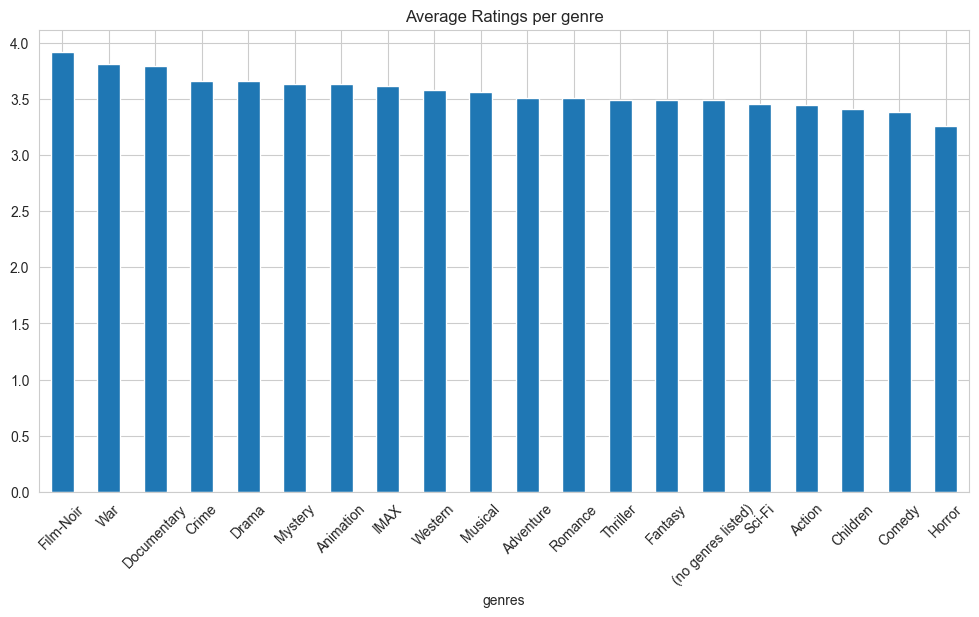

In [44]:
merged = pd.merge(ratings,movies,on='movieId',how='left')

genre_ratings = merged.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_ratings.plot(kind='bar')
plt.title("Average Ratings per genre")
plt.xticks(rotation=45)
plt.show()

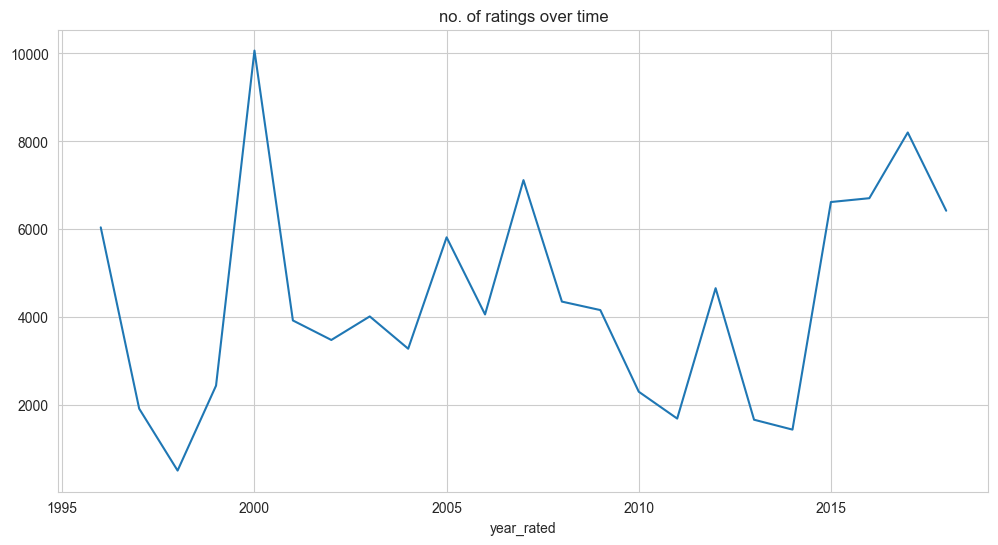

In [45]:
merged['datetime'] = pd.to_datetime(merged['timestamp'], unit='s')
merged['year_rated'] = merged['datetime'].dt.year

plt.figure(figsize=(12,6))
merged['year_rated'].value_counts().sort_index().plot()
plt.title("no. of ratings over time")
plt.show()

In [46]:
print("key insignts: ")
print("- Most common ratings: ",ratings['rating'].mode()[0])
print("- Most active user rated",ratings_per_user.max(),"movies.")
print("- Most rated movie has ", ratings_per_movie.max(),"ratings.")
print("- Top 3 genres by count: ",all_genres.index[:3].tolist())
print("- Highest average rating genre:", genre_ratings.index[0])

key insignts: 
- Most common ratings:  4.0
- Most active user rated 2698 movies.
- Most rated movie has  329 ratings.
- Top 3 genres by count:  ['Drama', 'Comedy', 'Thriller']
- Highest average rating genre: Film-Noir
